C:\Users\Tang Ying Kin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if sys.path[0] == '':


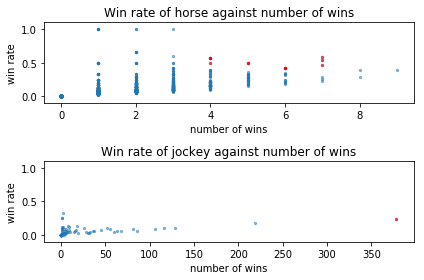

Best horse:P303 win rate = 0.5833333333333334 number of wins = 7
Best jockey:J Moreira win rate = 0.2445019404915912 number of wins = 378


In [4]:
import os
import csv
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_list(df = [] , col_type = ''):
    list_set = np.empty(0)
    for index, row in df.iterrows():
        #print(row[col_type])
        if not row[col_type] in list_set:
            list_set = np.append(list_set , row[col_type])
    return list_set

def get_data(name = ''):
    df = ""
    path = os.getcwd()
    direct='data'
    file=os.path.join(path,direct, name)
    #opencsv=""
    try:
        opencsv = open(os.path.join(path,direct,name), 'r')
        #print(opencsv)#find the race-result-horse file
    except:
        while opencsv != name:  # if the file cant be found if there is an error
            print("Could not open ", "file")
            opencsv = input("\nPlease try to open file again: ")
    else:
        with open(os.path.join(path,direct,name)) as f:
            feature_names = []#f.readline()
            #print(feature_names)
            reader = csv.reader(f)
            for row in reader:
                feature_names = row
                #print(feature_names)
                break
            df =  pd.read_csv(open(os.path.join(path,direct,name)), header=None, names = feature_names) #, na_values = ['WV-A' , 'WV'])
            df.drop(0, inplace = True)
    return df

def plot_scatter():
    df = get_data('training.csv')
    #df_test = get_data('testing.csv')
    #df = df_train.append(df_test , ignore_index = True)
    
    horse_id_set = get_list(df , 'horse_id')
    #print(horse_id_set.shape[0])
    
    scatter_horse_df = pd.DataFrame([] , columns = ['horse_id' , 'win_rate' , 'number_of_wins'])
    count = 0 
    
    for i in range(horse_id_set.shape[0]):
        horse_stat = df[df["horse_id"]== horse_id_set[i]].loc[:,['finishing_position']].reset_index()
        #print(horse_stat)
        no_win = horse_stat[horse_stat["finishing_position"] == '1'].shape[0]
        win_rate = no_win/horse_stat.shape[0]
        scatter_horse_df.loc[count , ['horse_id' , 'win_rate' , 'number_of_wins']] = [horse_id_set[i] , win_rate , no_win]
        count = count+1
        #print(win_rate)
        
    #print(scatter_horse_df)  
    
    
    jockey_id_set = get_list(df , 'jockey')
    #print(jockey_id_set.shape[0])
    
    scatter_jockey_df = pd.DataFrame([] , columns = ['jockey_id' , 'win_rate' , 'number_of_wins'])
    count = 0 
    
    for i in range(jockey_id_set.shape[0]):
        jockey_stat = df[df["jockey"]== jockey_id_set[i]].loc[:,['finishing_position']].reset_index()
        #print(horse_stat)
        no_win = jockey_stat[jockey_stat["finishing_position"] == '1'].shape[0]
        win_rate = no_win/jockey_stat.shape[0]
        scatter_jockey_df.loc[count , ['jockey_id' , 'win_rate' , 'number_of_wins']] = [jockey_id_set[i] , win_rate , no_win]
        count = count+1
        #print(win_rate)
        
    #print(scatter_jockey_df)  
    pre = scatter_horse_df[scatter_horse_df["win_rate"] > 0.4]
    good_horse = pre[pre["number_of_wins"] >= 4]
    good_horse = good_horse.sort_values(by=['number_of_wins'] , ascending = False).reset_index()
    #print(good_horse)
    
    pre = scatter_jockey_df[scatter_jockey_df["win_rate"] > 0.2]
    good_jockey = pre[pre["number_of_wins"] >= 10]
    good_jockey = good_jockey.sort_values(by=['win_rate','number_of_wins'] , ascending = False).reset_index()
    #print(good_jockey)
        
    plt.subplot(2,1,1)
    plt.scatter(scatter_horse_df.loc[:,['number_of_wins']].values.ravel(), scatter_horse_df.loc[:,['win_rate']].values.ravel()
             , s=5, alpha=.5)
    plt.scatter(good_horse.loc[:,['number_of_wins']].values.ravel(), good_horse.loc[:,['win_rate']].values.ravel()
             ,c='red', s=5, alpha=.5)
    plt.ylim( -0.1 , 1.1)
    plt.xlabel('number of wins')
    plt.ylabel('win rate')
    plt.title("Win rate of horse against number of wins")
    plt.subplot(2,1,2)
    plt.scatter(scatter_jockey_df.loc[:,['number_of_wins']].values.ravel(), scatter_jockey_df.loc[:,['win_rate']].values.ravel()
             , s=5,  alpha=.5)
    plt.scatter(good_jockey.loc[:,['number_of_wins']].values.ravel(), good_jockey.loc[:,['win_rate']].values.ravel()
             ,c='red', s=5, alpha=.5)
    plt.xlabel('number of wins')
    plt.ylabel('win rate')
    plt.ylim( -0.1 , 1.1)
    plt.title("Win rate of jockey against number of wins")
    plt.tight_layout()
    plt.show()
    
    
    print("Best horse:{0} win rate = {1} number of wins = {2}".format(good_horse.loc[0,['horse_id']].iloc[0] ,good_horse.loc[0,['win_rate']].iloc[0] 
                                                                     ,good_horse.loc[0,['number_of_wins']].iloc[0]))
    print("Best jockey:{0} win rate = {1} number of wins = {2}".format(good_jockey.loc[0,['jockey_id']].iloc[0] ,good_jockey.loc[0,['win_rate']].iloc[0] 
                                                                     ,good_jockey.loc[0,['number_of_wins']].iloc[0]))
    


if __name__ == '__main__':
    
    plot_scatter()
   